In [40]:
import os
import pandas as pd
import seaborn as se
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [6]:
result = {}
for result_basename in os.listdir('./data/whitebox_results'):
    model_number = result_basename.split('.')[0].split('_')[-1]
    result_path = os.path.join('./data/whitebox_results', result_basename)
    with open(result_path, 'rb') as file:
        result[model_number] = pickle.load(file)

In [18]:
clean_results = [result[str(i)]['clean'] for i in range(200)]
inc_eps_01 = [result[str(i)]['attacked'][0]['inclusive'] for i in range(200)]
exc_eps_01 = [result[str(i)]['attacked'][0]['exclusive'] for i in range(200)]
inc_eps_02 = [result[str(i)]['attacked'][1]['inclusive'] for i in range(200)]
exc_eps_02 = [result[str(i)]['attacked'][1]['exclusive'] for i in range(200)]
inc_eps_03 = [result[str(i)]['attacked'][2]['inclusive'] for i in range(200)]
exc_eps_03 = [result[str(i)]['attacked'][2]['exclusive'] for i in range(200)]

In [32]:
se.set_style("dark")

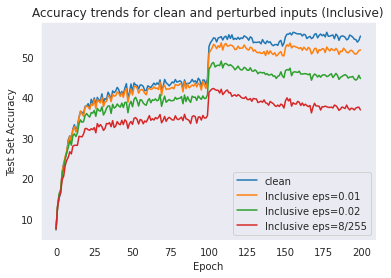

In [48]:
ax = pd.DataFrame.from_dict({
    "clean": clean_results,
    "Inclusive eps=0.01": inc_eps_01,
    "Inclusive eps=0.02": inc_eps_02,
    "Inclusive eps=8/255": inc_eps_03,
}).plot(kind='line')
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Set Accuracy')
ax.set_title('Accuracy trends for clean and perturbed inputs (Inclusive)')
ax.figure.savefig('Figures/inclusive.png')

In [59]:
max_val = max(inc_eps_01)
print(f"{inc_eps_01.index(max_val)}: {max_val}")
max_val = max(inc_eps_02)
print(f"{inc_eps_02.index(max_val)}: {max_val}")
max_val = max(inc_eps_03)
print(f"{inc_eps_03.index(max_val)}: {max_val}")
max_val = max(clean_results)
print(f"{clean_results.index(max_val)}: {max_val}")

108: 53.51
108: 48.98
103: 42.22
177: 56.11


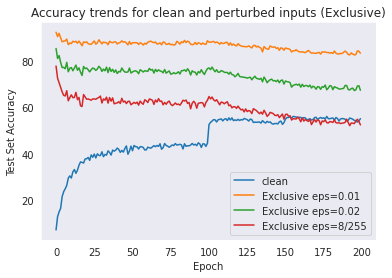

In [49]:
ax = pd.DataFrame.from_dict({
    "clean": clean_results,
    "Exclusive eps=0.01": exc_eps_01,
    "Exclusive eps=0.02": exc_eps_02,
    "Exclusive eps=8/255": exc_eps_03,
}).plot(kind='line')
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Set Accuracy')
ax.set_title('Accuracy trends for clean and perturbed inputs (Exclusive)')
ax.figure.savefig('Figures/Exclusive.png')

In [60]:
max_val = max(exc_eps_01)
print(f"{exc_eps_01.index(max_val)}: {max_val}")
max_val = max(exc_eps_02)
print(f"{exc_eps_02.index(max_val)}: {max_val}")
max_val = max(exc_eps_03)
print(f"{exc_eps_03.index(max_val)}: {max_val}")

0: 92.31824417009602
0: 85.32235939643347
0: 77.77777777777777
